# ** Linear Regression Rental Bikes Assignment **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Data reading


In [ ]:

day = pd.read_csv('/content/sample_data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#understanding numenrical data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#data analysis and no null values found.
day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#Data Cleaning and Manipulation

In [ ]:
#making binary for WEEKDAY as 1 or 0
day['weekday']=day['weekday'].apply(lambda x:1 if x in [1,2,3,4,5] else 0)

#dropped columns 'casual' and 'registered'
day = day.drop('casual', axis=1)
day = day.drop('registered', axis=1)

In [ ]:
# Convert 'dteday' column to datetime objects
day['dteday'] = pd.to_datetime(day['dteday'], format='%d-%m-%Y') # Specifying the correct format '%d-%m-%Y' for DD-MM-YYYY
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.0 KB


In [ ]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,1,0,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,1,0,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600


#EDA
#Bivarient analysis

<Axes: xlabel='workingday', ylabel='cnt'>

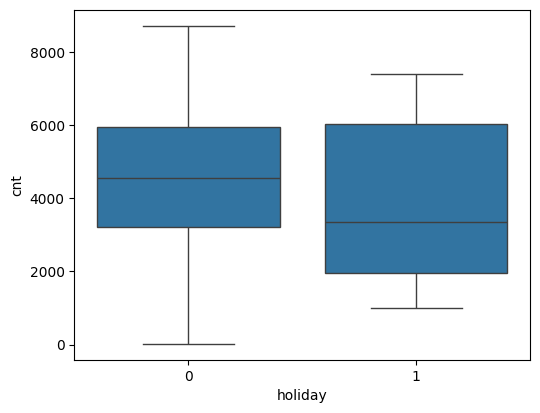

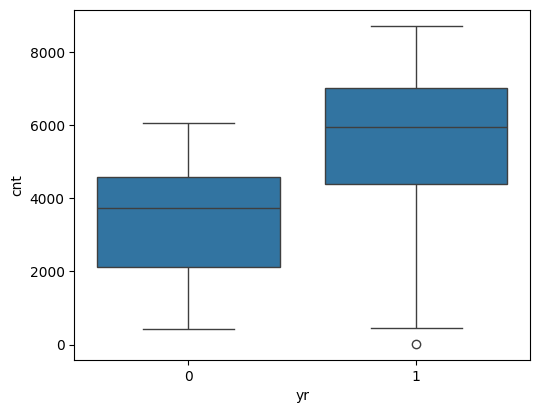

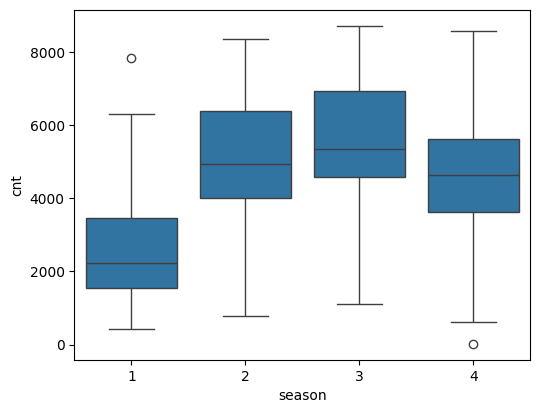

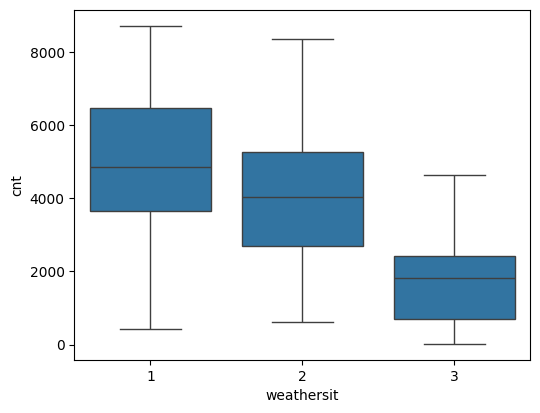

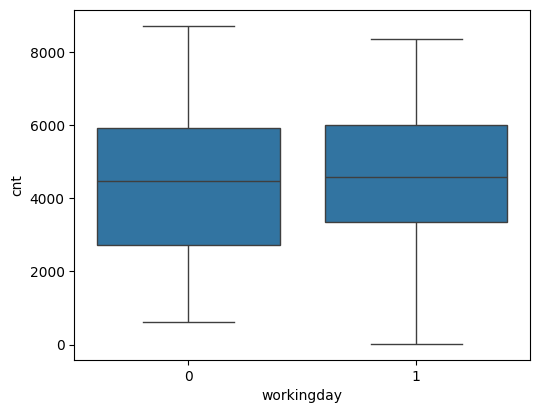

In [ ]:


#visualize categorical variebles
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(x='holiday', y='cnt', data=day) #when its NOT holiday usage of rental bikes are high
plt.figure(figsize=(20,10))
plt.subplot(2,3,3)
sns.boxplot(x='yr', y='cnt', data=day) #2019 the count of bike renters were more
plt.figure(figsize=(20,10))
plt.subplot(2,3,4)
sns.boxplot(x='season', y='cnt', data=day) #surprising ly during fall the usage of rental bikes are high
plt.figure(figsize=(20,10))
plt.subplot(2,3,5)
sns.boxplot(x='weathersit', y='cnt', data=day) #when weather is clear the  usage of rental bikes are high
plt.figure(figsize=(20,10))
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=day) #no drastic gap of rentals between working and non-working day



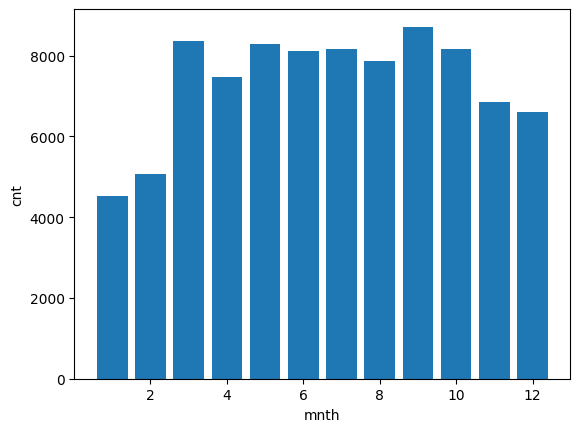

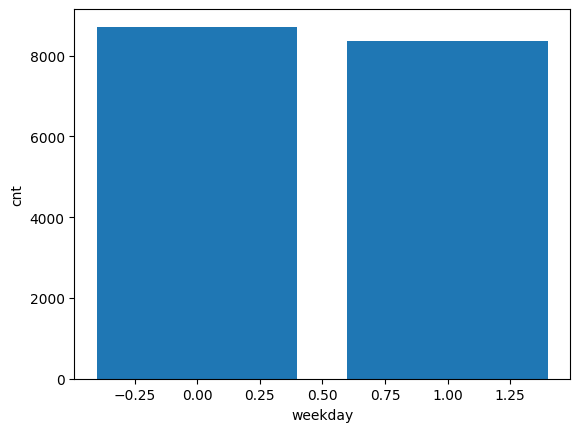

In [ ]:
#visualizing categorical vriebles with bar plot

plt.bar(x=day['mnth'], height=day['cnt'])
plt.xlabel('mnth')
plt.ylabel('cnt')
plt.show() # rentall bikes business is doing good from March to October month
plt.bar(x=day['weekday'],height=day['cnt'])
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.show() # no good insight during weekdays



#Multivariant analysis

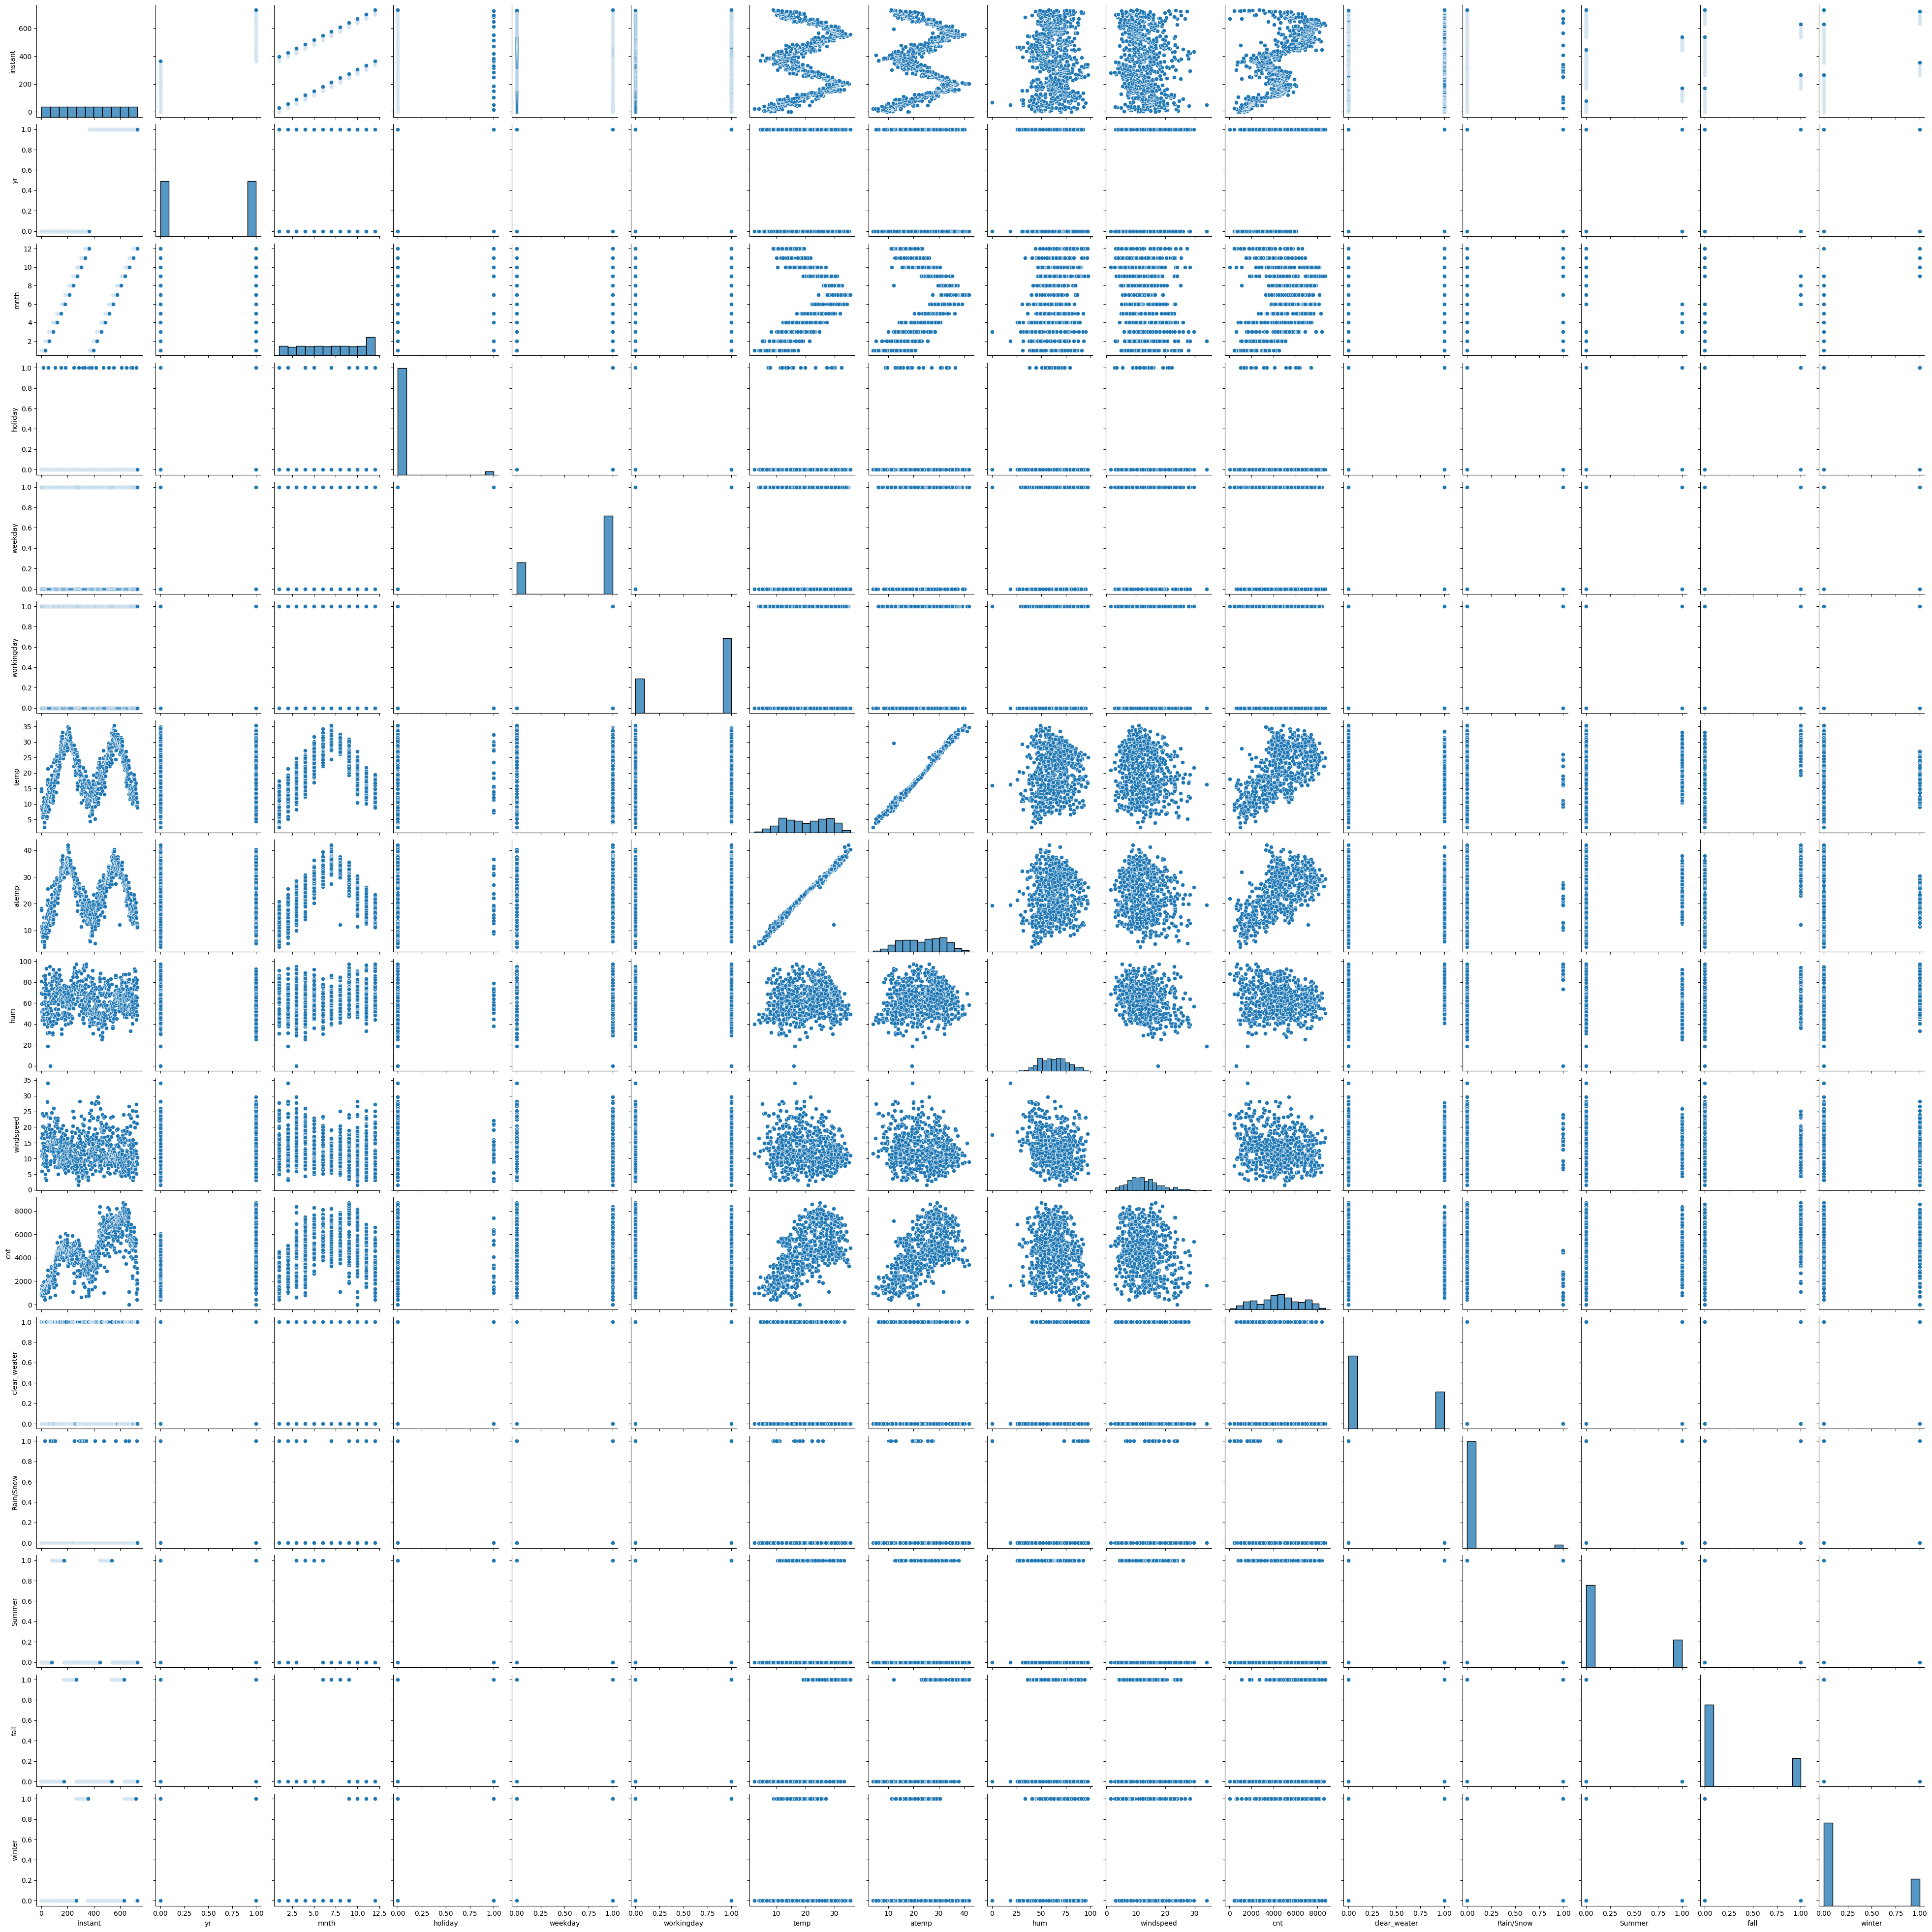

In [ ]:


sns.pairplot(day)
plt.show()

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.0 KB


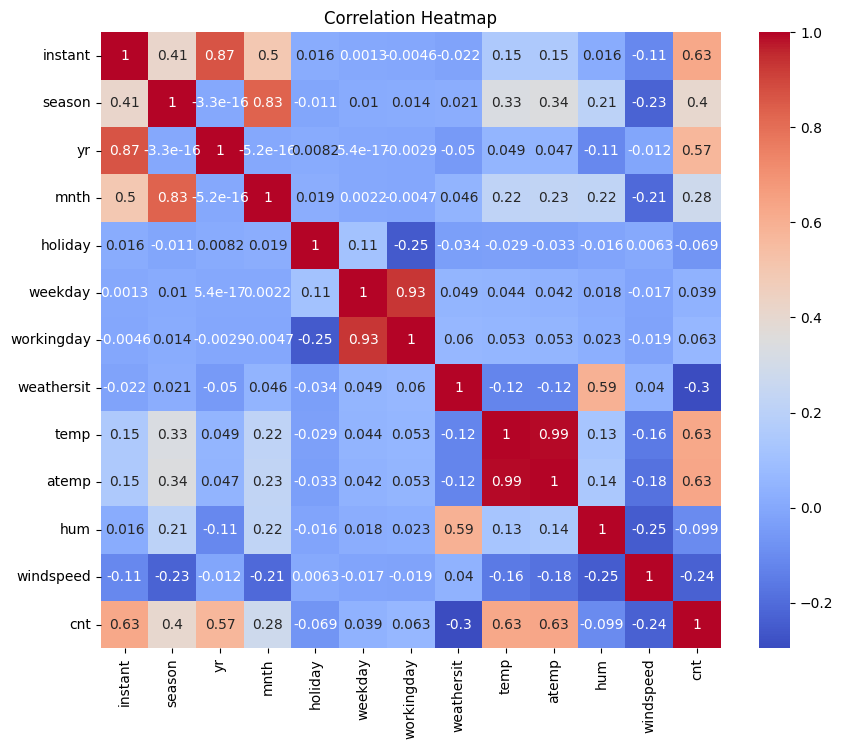

In [ ]:
# <Multivarient analysis>
#Select only numerical features for correlation analysis
numerical_features = day.select_dtypes(include=[np.number])

# Calculate correlation matrix for numerical features
correlation_matrix = numerical_features.corr()

# Plot heatmap using the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#  count of rental bikes are highly correlated with year 2019 and temperature

In [ ]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,1,0,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,1,0,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600


#Creating dummy variebles

In [ ]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'
status = pd.get_dummies(day['weathersit'], drop_first=True ,dtype=int)

# Check what the dataset 'status' looks like
status.head()
status = status.rename(columns={2: 'clear_weater', 3: 'Rain/Snow'}) # renaming with meaningfull strings for columns 2 and 3
status.head()

,clear_weater,Rain/Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [ ]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status2'
status2= pd.get_dummies(day['season'], drop_first=True, dtype=int)
status2 = status2.rename(columns={2: 'Summer', 3: 'fall', 4: 'winter'})
status2.head()

,Summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
#concat the dummy df with original one

day = pd.concat([day, status], axis=1)
day = pd.concat([day, status2], axis=1)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,clear_weater,Rain/Snow,Summer,fall,winter
0,1,2018-01-01,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,4,2018-01-04,1,0,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,5,2018-01-05,1,0,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [ ]:
day = day.drop(['weathersit', 'season'], axis=1) # dropping redundant variebles
day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear_weater,Rain/Snow,Summer,fall,winter
0,1,2018-01-01,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,2,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,3,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,4,2018-01-04,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,5,2018-01-05,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


#Splitting Train and Test set

In [ ]:
#spliting into train and test

day_train, day_test= train_test_split(day, train_size=0.7, random_state=100)
print(day_train.shape)
print(day_test.shape)

(510, 17)
(220, 17)


In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       730 non-null    int64         
 1   dteday        730 non-null    datetime64[ns]
 2   yr            730 non-null    int64         
 3   mnth          730 non-null    int64         
 4   holiday       730 non-null    int64         
 5   weekday       730 non-null    int64         
 6   workingday    730 non-null    int64         
 7   temp          730 non-null    float64       
 8   atemp         730 non-null    float64       
 9   hum           730 non-null    float64       
 10  windspeed     730 non-null    float64       
 11  cnt           730 non-null    int64         
 12  clear_weater  730 non-null    int64         
 13  Rain/Snow     730 non-null    int64         
 14  Summer        730 non-null    int64         
 15  fall          730 non-null    int64     

In [ ]:
day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear_weater,Rain/Snow,Summer,fall,winter
0,1,2018-01-01,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,2,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,3,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,4,2018-01-04,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,5,2018-01-05,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


#Scaling the Variebles

In [ ]:

#Normalization :(x-xmin)/(xmax-xmin)
# Apply scaler() to all the columns except the binary 0/1 and 'dummy' variables

scaler=MinMaxScaler()
#create list of numeric vars
num_vars= ['mnth','temp','atemp','hum','windspeed','cnt']

#fit the data
day_train[num_vars]= scaler.fit_transform(day_train[num_vars])
day_train[num_vars].head()

,mnth,temp,atemp,hum,windspeed,cnt
576,0.545455,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.181818,0.442393,0.438975,0.640189,0.255342,0.465255
728,1.000000,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.272727,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.272727,0.345824,0.318819,0.751824,0.380981,0.191095


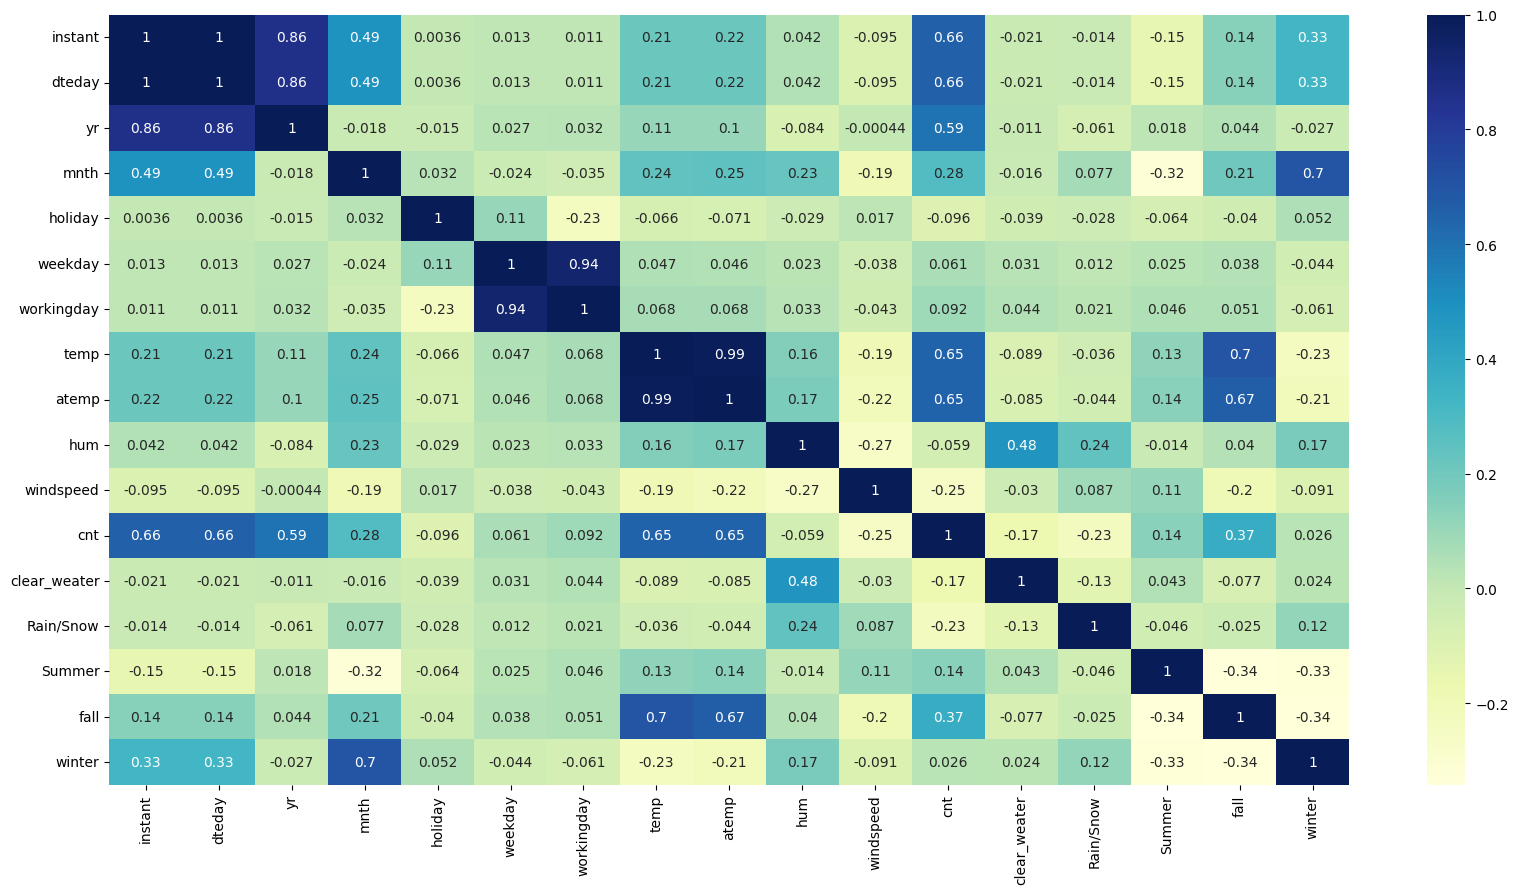

In [ ]:
#before raining eh model ,checking the correlation after scaling
plt.figure(figsize=(20,10))
sns.heatmap(day_train.corr(), annot=True, cmap="YlGnBu")
plt.show()
#picking the cnt as it has good correlation with  multiple variebles

#Training the model

In [ ]:

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

day_train = day_train.drop('dteday', axis=1)
day_train = day_train.drop('instant', axis=1)

In [ ]:
day_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear_weater,Rain/Snow,Summer,fall,winter
576,1,0.545455,0,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0
426,1,0.181818,0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0
728,1,1.000000,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0
482,1,0.272727,0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,0,0
111,0,0.272727,0,1,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,1,0,0


In [ ]:
#X_train,y_train
y_train = day_train.pop('cnt') #only count column
X_train = day_train  #remaining columns other than count

In [ ]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,clear_weater,Rain/Snow,Summer,fall,winter
576,1,0.545455,0,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0
426,1,0.181818,0,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0
728,1,1.000000,0,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0
482,1,0.272727,0,0,0,0.395666,0.391735,0.504508,0.188475,1,0,1,0,0
111,0,0.272727,0,1,1,0.345824,0.318819,0.751824,0.380981,1,0,1,0,0


#RFE

In [ ]:
# Running RFE with the output number of the variable equal to 11
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=11) # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 2),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('clear_weater', True, 1),
 ('Rain/Snow', True, 1),
 ('Summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'clear_weater',
       'Rain/Snow', 'Summer', 'fall', 'winter'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]
# 'mnth', 'weekday', 'workingday' are teh columns to eliminate

Index(['mnth', 'weekday', 'workingday'], dtype='object')

In [ ]:
X_train_rfe = sm.add_constant(X_train[col])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          1.27e-181
Time:                        16:19:46   Log-Likelihood:                 486.01
No. Observations:                 510   AIC:                            -948.0
Df Residuals:                     498   BIC:                            -897.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2180      0.028      7.770   

In [ ]:

#dropping insignificant atemp first as teh p>0.05 which 0.817
X_train_new = X_train_rfe.drop(['atemp'], axis=1)


In [ ]:
#rebuilding model without atemp

X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          8.27e-183
Time:                        16:19:46   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2183      0.028      7.804   

In [ ]:
X_train_new.head()

,const,yr,holiday,temp,hum,windspeed,clear_weater,Rain/Snow,Summer,fall,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,1,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,1,0,0


In [ ]:

X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'clear_weater',
       'Rain/Snow', 'Summer', 'fall', 'winter'],
      dtype='object')

In [ ]:
X_train_new = X_train_new.drop(['const'], axis=1)

#VIF Method

In [ ]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,22.68
3,hum,15.00
8,fall,6.48
4,windspeed,3.63
7,Summer,3.38
9,winter,2.47
5,clear_weater,2.13
0,yr,2.03
6,Rain/Snow,1.17
1,holiday,1.04


In [ ]:
x = X_train_new.drop(['hum'], axis=1)

In [ ]:
X_train_sm = sm.add_constant(x)
lr= sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()
# the model is 82% is correlated with rental count

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          2.84e-181
Time:                        16:19:46   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1395      0.018      7.953      0.000       0.105       0.174
yr               0.2341      0.009     27.423      0.000       0.217       0.251
holiday         -0.0872      0.027     -3.231      0.001      -0.140      -0.034
temp             0.4662      0.034     13.698      0.000       0.399       0.533
windspeed       -0.1546      0.026     -5.942      0.000      -0.206      -0.103
clear_weater    -0.0750      0.009     -8.291      0.000      -0.093      -0.057
Rain/Snow       -0.2785      0.026    -10.873      0.000      -0.329      -0.228
Summer           0.1209      0.016      7.743      0.000       0.090       0.152
fall             0.0827      0.021      3.959      0.000       0.042       0.124
winter           0.1572      0.013     11.813      0.000       0.131       0.183
==============================================================================
Omnibus:                       62.352   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.141
Skew:                          -0.634   Prob(JB):                     5.57e-34
Kurtosis:                       5.366   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

# we have good features like summer,windspeed,year,clear_weather as good predictions or good vif as they are <5

,Features,VIF
2,temp,14.13
7,fall,6.14
6,Summer,3.34
3,windspeed,3.26
8,winter,2.38
0,yr,2.02
4,clear_weater,1.47
5,Rain/Snow,1.08
1,holiday,1.03


#Residual Analysis of trained data

In [ ]:
y_train_cnt = lm.predict(X_train_lm)

<ipython-input-263-a0ab18a40d67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

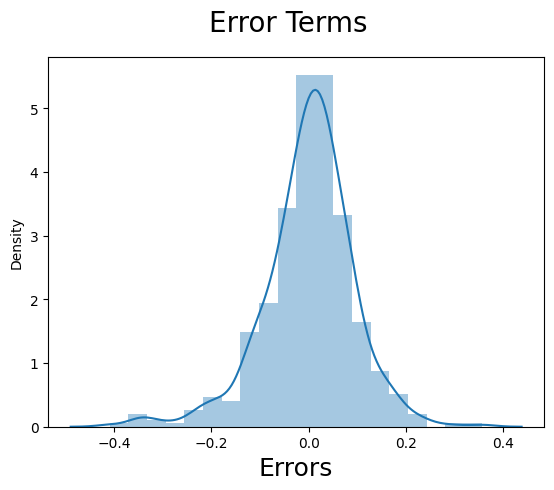

In [ ]:
# Importing the required libraries for plots.
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

#Making Predictions

In [ ]:
num_vars= ['mnth','temp','atemp','hum','windspeed','cnt']
day_test[num_vars]= scaler.transform(day_test[num_vars]) #in test we shouldnt usefit_transform but we can simply transform
day_test.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear_weater,Rain/Snow,Summer,fall,winter
184,185,2018-07-04,0,0.545455,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,1,0
535,536,2019-06-20,1,0.454545,0,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,1,0,0
299,300,2018-10-27,0,0.818182,0,1,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1
221,222,2018-08-10,0,0.636364,0,1,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0
152,153,2018-06-02,0,0.454545,0,1,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,1,0,0


In [ ]:
#Dividing into X_test  and y_teest
y_test = day_test.pop('cnt')
X_test = day_test

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

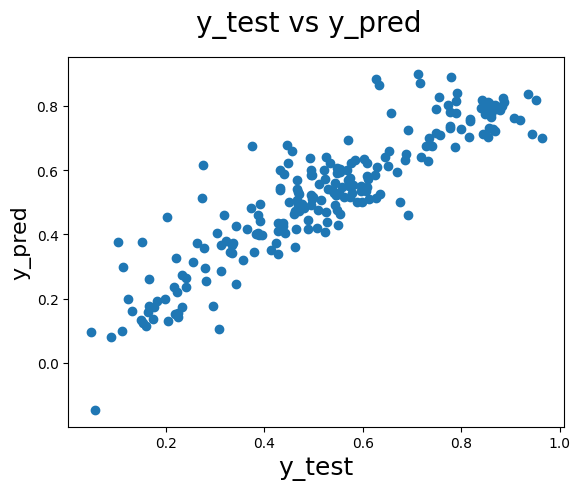

In [ ]:
#Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# **#Insights of the model##**

# we can see that equation of our best fitted line is:
 **Rental count = 0.2341*yr - 0.0872 * Holiday + 0.4662*temp - 0.1546 * windspeed - 0.0750 * windspeed -0.2785* Rain/Snow + 0.1209* Summer + 0.0827* fall + 0.1572* winter**



#The linear regression model exhibits a strong correlation with the rental count, achieving an R-squared value of 0.822.  This indicates that approximately 82.2% of the variance in the rental count can be explained by the independent variables included in the model.  Key predictors include year (yr), holiday status, temperature (temp), windspeed, weather situation (specifically rain/snow and clear weather), and season (summer, fall, and winter).  Further analysis using VIF (Variance Inflation Factor) identified 'hum' (humidity) as having multicollinearity and was removed.  Residual analysis supported the model's overall validity.